In [1]:
from unityagents import UnityEnvironment
import numpy as np
from dqn_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import random
import torch

### Train the DQN on the environment

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 1.41
Episode 200	Average Score: 5.17
Episode 300	Average Score: 8.98
Episode 400	Average Score: 10.95
Episode 500	Average Score: 12.99
Episode 600	Average Score: 13.70
Episode 700	Average Score: 14.83
Episode 718	Average Score: 15.03
Environment solved in 618 episodes!	Average Score: 15.03


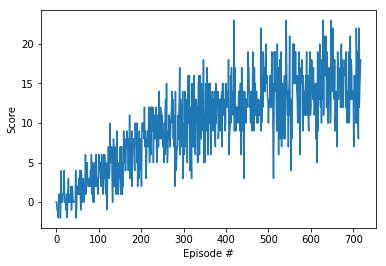

In [2]:
# define hyperparameters

#total number of episodes for training
n_episodes=2000
#epsilon start value - max
eps_start=1.0

#epsilon minimum value
eps_end=0.01

#epsilon decay factor
eps_decay=0.995




# load the banana environment
env = UnityEnvironment(file_name="./Banana.app")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name] 

#get initial state
state = env_info.vector_observations[0] 

#create a DQN agent
agent = Agent(state_size=len(state), action_size=brain.vector_action_space_size, seed=0)

# list containing scores from each episode
scores = []

# last 100 scores
scores_window = deque(maxlen=100)

# initialize epsilon
eps = eps_start  


for i_episode in range(1, n_episodes+1):
    # reset the environment at each new episode
    env_info = env.reset(train_mode=True)[brain_name] 
    
    # get initial state
    state = env_info.vector_observations[0]  
    
    # initialize the score for this episode to 0
    score = 0
    
    # iterate till done
    while True:
        # decide which action to take given the state
        action = agent.act(state, eps)
        
        # take the action
        env_info = env.step(action)[brain_name]
        
        #get the next state achieved after taking the action
        next_state = env_info.vector_observations[0]   
        
        # get the reward achieved after taking the action
        reward = env_info.rewards[0]  
        
        # get value if this is the end of the episode
        done = env_info.local_done[0] 
        
        # learn 
        agent.step(state, action, reward, next_state, done)
        
        state = next_state
        score += reward
        if done:
            break 
            
    # save most recent score
    scores_window.append(score)       
    
    # save most recent score
    scores.append(score) 
    
    # decrease epsilon
    eps = max(eps_end, eps_decay*eps) 
    
    # print score
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
    if i_episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    
    # If average score is above 15 the environment is considered solved, save the model file
    if np.mean(scores_window)>=15.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
        break




# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()